In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import logging
from classes.optimal_catboost import OptimalCatBoostClassifier

def generate_dataset():
    X, y = make_classification(
        n_samples=1000, 
        n_features=10, 
        n_informative=5, 
        n_redundant=2, 
        n_classes=3, 
        random_state=42
    )
    cat_features = [f"cat_{i}" for i in range(3)]  # Categorical feature names
    num_features = [f"num_{i}" for i in range(7)]  # Numerical feature names
    
    X_df = pd.DataFrame(X, columns=num_features + cat_features)
    # Add some fake categorical data
    for cat in cat_features:
        X_df[cat] = np.random.choice(["A", "B", "C"], size=X_df.shape[0])
    
    y_df = pd.Series(y, name="target")
    return X_df, y_df, num_features, cat_features

param_grid = {
    "iterations": [100, 300],
    "depth": [4, 6],
    "learning_rate": (0.01, 0.1),
    "l2_leaf_reg": (1, 5),
}

In [37]:
%%time
X, y, num_features, cat_features = generate_dataset()

model = OptimalCatBoostClassifier(
    features=num_features + cat_features,
    param_grid=param_grid,
    n_trials=10,
    cat_features=cat_features,
    cache_path='test.db',
)
    
model.fit(X, y)

[I 2024-12-06 20:03:35,916] A new study created in RDB with name: catboost_optimization_ce2abd0a-b9d6-437e-a4e4-393a29eacac1
/home/krystian/Python/Jupyter-projects/thesis/songs_analysis/classes/optimal_catboost.py:89: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  estimator=CatBoostClassifier(cat_features=self.cat_features, class_weights=class_weights, verbose=0),
[I 2024-12-06 20:03:38,967] Trial 5 finished with value: 0.6887206263476653 and parameters: {'iterations': 100, 'depth': 4, 'learning_rate': 0.035656564009390566, 'l2_leaf_reg': 4.7110039865255615}. Best is trial 5 with value: 0.6887206263476653.
[I 2024-12-06 20:03:39,007] Trial 7 finished with value: 0.6993671199012448 and parameters: {'iterations': 100, 'depth': 4, 'learning_rate': 0.07285844413841593, 'l2_leaf_reg': 2.262778952920332}. Best is trial 7 with value: 0.6993671199012448.


KeyboardInterrupt: 

[I 2024-12-06 20:03:44,861] Trial 8 finished with value: 0.7167526895308876 and parameters: {'iterations': 100, 'depth': 6, 'learning_rate': 0.062049741563123824, 'l2_leaf_reg': 1.4014356317977454}. Best is trial 8 with value: 0.7167526895308876.


In [3]:
%%time
X, y, num_features, cat_features = generate_dataset()

model = OptimalCatBoostClassifier(
    features=num_features + cat_features,
    param_grid=param_grid,
    n_trials=10,
    cat_features=cat_features,
    cache_path=None,
)
    
model.fit(X, y)

/home/krystian/Python/Jupyter-projects/thesis/songs_analysis/classes/optimal_catboost.py:85: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2024-12-06 01:15:06,114] A new study created in memory with name: no-name-402002b5-bdd0-4e4e-addc-1a68cef25ed9
[I 2024-12-06 01:15:10,738] Trial 0 finished with value: 0.7390169706778331 and parameters: {'iterations': 300, 'depth': 6, 'learning_rate': 0.05366684736783671, 'l2_leaf_reg': 2.193046525460523}. Best is trial 0 with value: 0.7390169706778331.
[I 2024-12-06 01:15:12,087] Trial 1 finished with value: 0.7208878612069778 and parameters: {'iterations': 100, 'depth': 6, 'learning_rate': 0.041416089689022245, 'l2_leaf_reg': 4.997003441360379}. Best is trial 0 with value: 0.7390169706778331.
[I 2024-12-06 01:15:13,397] Trial 2 finished with value: 0.7302257231215677 and parameters: {'iterations': 100, 'depth': 6, 'learning_rate': 0.0871271

CPU times: user 2min 30s, sys: 20.5 s, total: 2min 51s
Wall time: 30.5 s


In [31]:
model.training_results

,Metric,Score
0,Accuracy,0.829
1,F1 Score,0.829
2,Precision,0.829
3,Recall,0.829


In [32]:
model.model.class_weights

AttributeError: 'OptimalCatBoostClassifier' object has no attribute 'model'

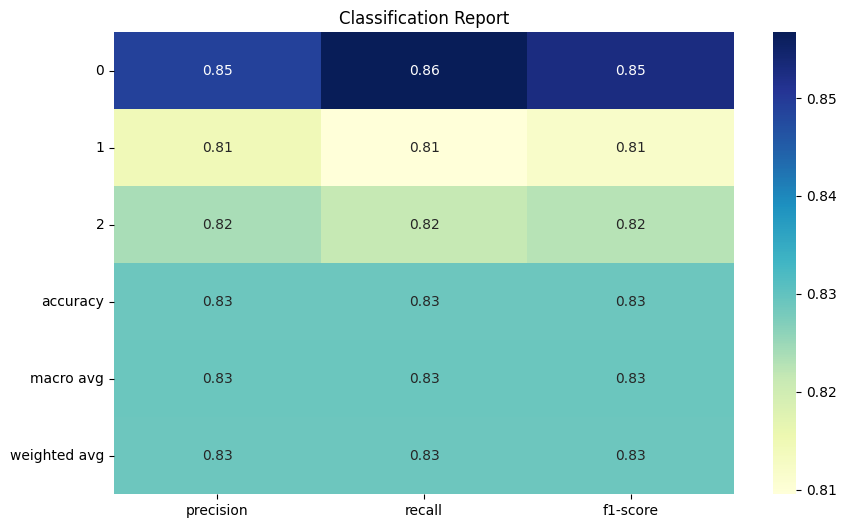

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def visualize_classification_report(y_true, y_pred):
    # Generate the classification report as a dictionary
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert to DataFrame
    report_df = pd.DataFrame(report_dict).iloc[:-1, :].T  # Exclude support row
    
    # Create a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("Classification Report")
    plt.show()
visualize_classification_report(model.predict(X), y)

In [29]:
def display_classification_results(y_true, y_pred):
    from sklearn.metrics import classification_report
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Generate classification report as a dictionary
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert to DataFrame
    report_df = pd.DataFrame(report_dict).transpose()
    
    # Extract accuracy
    accuracy = report_dict.get("accuracy", None)
    
    # Separate per-class metrics (excluding accuracy) and averages
    averages = report_df.loc[["macro avg", "weighted avg"]].reindex(["macro avg", "weighted avg"], fill_value=0)
    class_metrics = report_df.drop(index=["macro avg", "weighted avg", "accuracy"], errors="ignore")
    
    # Display class metrics with averages
    print("Classification Report (Per Class and Averages):")
    display(pd.concat([class_metrics, averages]))
    
    # Display accuracy separately
    if accuracy is not None:
        print("\nOverall Accuracy:")
        print(f"{accuracy:.4f}")
    else:
        print("\nOverall Accuracy: Not available")
    
    # Create a heatmap for the class metrics
    plt.figure(figsize=(10, 6))
    sns.heatmap(class_metrics.iloc[:, :-1], annot=True, cmap="YlGnBu", fmt=".2f")  # Exclude 'support'
    plt.title("Classification Report Heatmap (Per Class Metrics)")
    plt.show()


Classification Report (Per Class and Averages):


,precision,recall,f1-score,support
0,0.848943,0.856707,0.852807,328.0
1,0.814371,0.809524,0.811940,336.0
2,0.823881,0.821429,0.822653,336.0
macro avg,0.829065,0.829220,0.829133,1000.0
weighted avg,0.828906,0.829000,0.828944,1000.0



Overall Accuracy:
0.8290


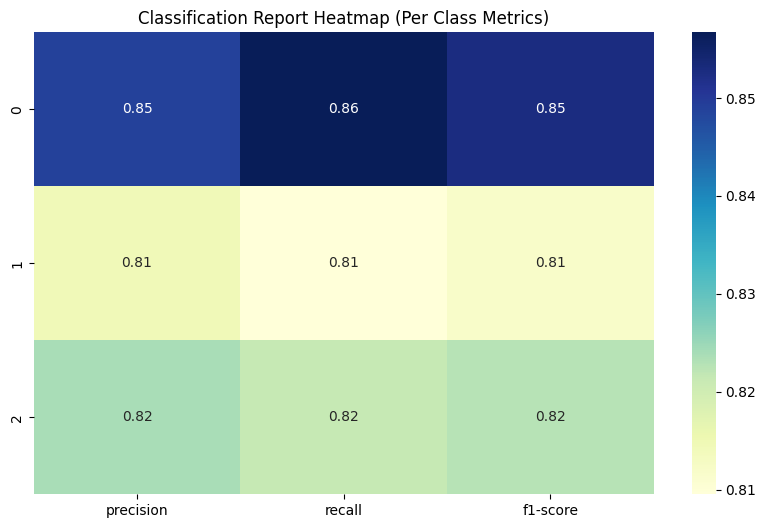

In [30]:
display_classification_results(model.predict(X), y)

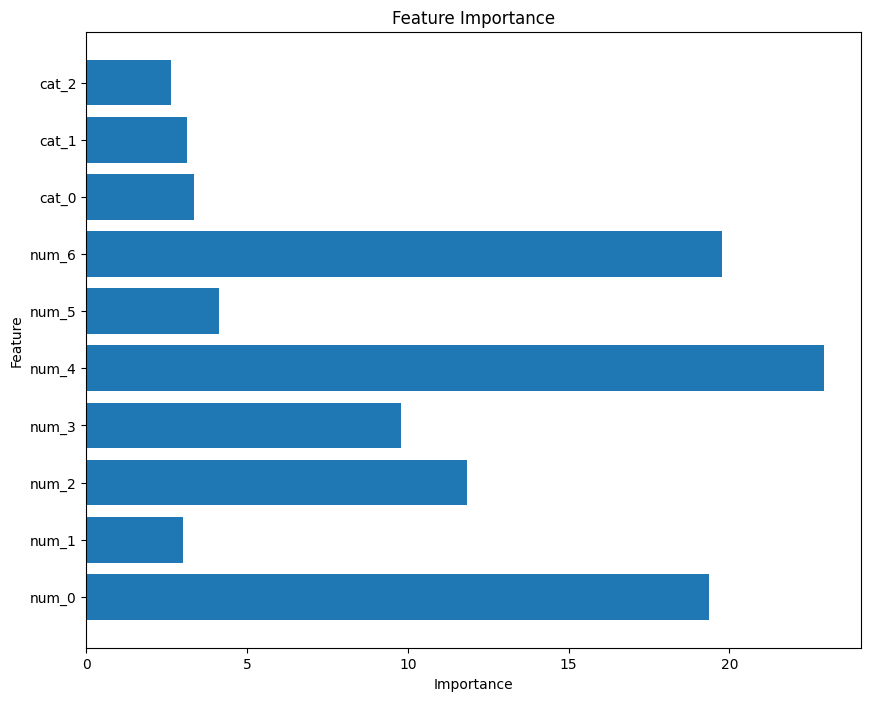

In [10]:
model.plot_feature_importance()

In [11]:
model

# Regression

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import logging
from classes.optimal_catboost import OptimalCatBoostRegressor  # Assumes you have an equivalent for regression

def generate_regression_dataset():
    X, y = make_regression(
        n_samples=1000,
        n_features=10,
        n_informative=7,
        noise=0.1,
        random_state=42,
    )
    cat_features = [f"cat_{i}" for i in range(3)]  # Categorical feature names
    num_features = [f"num_{i}" for i in range(7)]  # Numerical feature names

    X_df = pd.DataFrame(X, columns=num_features + cat_features)
    # Add some fake categorical data
    for cat in cat_features:
        X_df[cat] = np.random.choice(["A", "B", "C"], size=X_df.shape[0])

    y_df = pd.Series(y, name="target")
    return X_df, y_df, num_features, cat_features

# Define the parameter grid for the CatBoost regressor
param_grid = {
    "iterations": [100, 300],
    "depth": [4, 6],
    "learning_rate": (0.01, 0.1),
    "l2_leaf_reg": (1, 5),
}

# Generate the dataset
X, y, num_features, cat_features = generate_regression_dataset()

# Initialize the OptimalCatBoostRegressor
model = OptimalCatBoostRegressor(
    features=num_features + cat_features,
    param_grid=param_grid,
    n_trials=10,
    cat_features=cat_features,
    cache_path=None,
)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X, y)

# # Evaluate the model
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Print evaluation metrics
# print("Regression Metrics:")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"R-Squared (R2): {r2:.4f}")

# # Optional: Plot feature importance
# logging.info("Plotting feature importance...")
# model.plot_feature_importance()


[I 2024-12-05 00:10:50,419] A new study created in memory with name: catboost_regressor_optimization
[I 2024-12-05 00:10:51,890] Trial 0 finished with value: 39.12805627107806 and parameters: {'iterations': 300, 'depth': 4, 'learning_rate': 0.07356883181720497, 'l2_leaf_reg': 1.575519955188402}. Best is trial 0 with value: 39.12805627107806.
[I 2024-12-05 00:10:52,854] Trial 1 finished with value: 39.28807829066834 and parameters: {'iterations': 300, 'depth': 4, 'learning_rate': 0.025860927194438464, 'l2_leaf_reg': 4.537304712458077}. Best is trial 0 with value: 39.12805627107806.
[I 2024-12-05 00:10:55,160] Trial 2 finished with value: 39.67657065291126 and parameters: {'iterations': 300, 'depth': 6, 'learning_rate': 0.01646433692721553, 'l2_leaf_reg': 2.1429922665185877}. Best is trial 0 with value: 39.12805627107806.
[I 2024-12-05 00:10:57,811] Trial 3 finished with value: 39.40418148113023 and parameters: {'iterations': 300, 'depth': 6, 'learning_rate': 0.0709724624342671, 'l2_leaf

In [6]:
model.training_results_

,Metric,Score
0,Mean Absolute Error,25.155631
1,Mean Squared Error,953.729079
2,Root Mean Squared Error,30.882504
3,R2 Score,0.832353


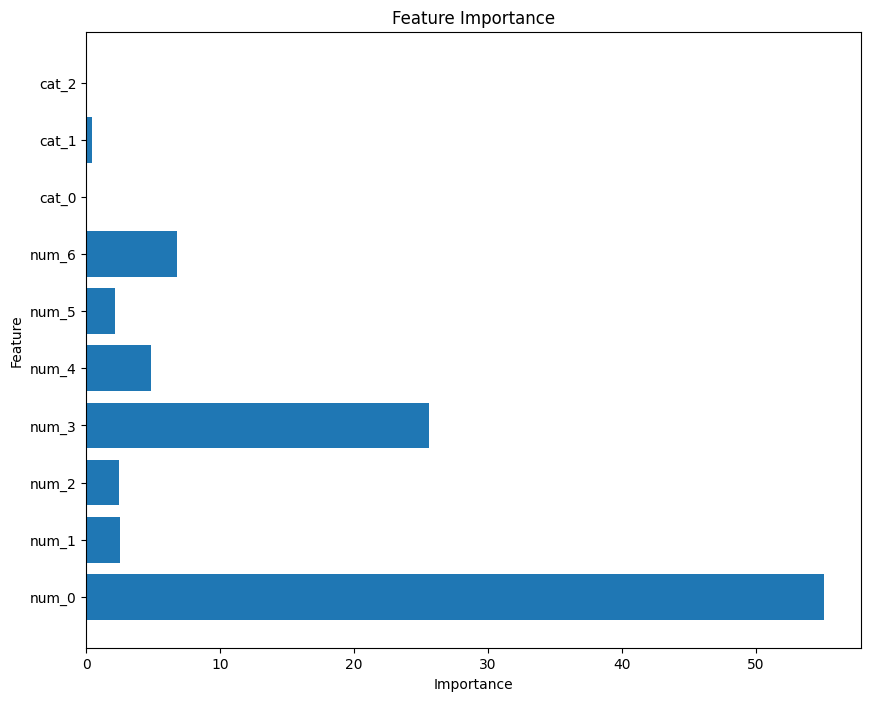

In [7]:
model.plot_feature_importance()